In [1]:
import pandas as pd
import re
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


# 1. Gathering the table with Ronnie Dio's studio albums

In [2]:
bands = ['elf', 'rainbow', 'black_sabbath', 'dio']

rainbow_dio = ["Ritchie Blackmore's Rainbow", "Rising", "Rainbow Rising", "Long Live Rock'n'Roll"]
black_sabbath_dio = ["Heaven Hell", "Mob Rules", "Live Evil", "Dehumanizer"]
dio_live_dio = ["Intermission", "Strange Highways", "Inferno: Last In Live"]
dio_first_4 = ["Holy Diver", "The Last In Line", "Sacred Heart", "Dream Evil"]

elf_df = pd.read_csv('discography/elf_discography_allthelyrics.csv', sep='\t', encoding='utf-8')
elf_df['band'] = 'elf'

rainbow_df = pd.read_csv('discography/rainbow_discography_allthelyrics.csv', sep='\t', encoding='utf-8')
rainbow_df['band'] = 'rainbow'
rainbow_dio_df = rainbow_df[rainbow_df['album'].isin(rainbow_dio)]

black_sabbath_df = pd.read_csv('discography/black_sabbath_discography_allthelyrics.csv', sep='\t', encoding='utf-8')
black_sabbath_df['band'] = 'black_sabbath'
black_sabbath_dio_df = black_sabbath_df[black_sabbath_df['album'].isin(black_sabbath_dio)]

dio_df = pd.read_csv('discography/dio_discography_allthelyrics.csv', sep='\t', encoding='utf-8')
dio_df['band'] = 'dio'
dio_dio_df = dio_df[~dio_df['album'].isin(dio_live_dio)]
dio_dio_df = dio_dio_df[dio_dio_df['album'].isin(dio_first_4)]

ronnie_discography = pd.concat([elf_df, rainbow_dio_df, black_sabbath_dio_df, dio_dio_df])
ronnie_discography

# ronnie_discography = []

# for band in bands:
#     lyrics_df = pd.read_csv('discography/' + band + '_discography_allthelyrics.csv', sep='\t', encoding='utf-8')
#     lyrics_df['band'] = band
#     if lyrics_df['band'].isin(['rainbow']).any():
#         lyrics_df = lyrics_df[lyrics_df['album'].isin(rainbow_dio)]
#     if lyrics_df['band'].isin(['black_sabbath']).any():
#         lyrics_df = lyrics_df[lyrics_df['album'].isin(black_sabbath_dio)]
#     if lyrics_df['band'].isin(['dio']).any():
#         lyrics_df = lyrics_df[~lyrics_df['album'].isin(dio_live_dio)]
#     ronnie_discography.append(lyrics_df)
    
# ronnie_discography = pd.concat(ronnie_discography)
# ronnie_discography


,song,link,album,lyrics,band
0,Ain't It All Amusing,https://www.allthelyrics.com/lyrics/elf/aint_i...,Carolina County Ball,"Baby if you flatter me, you might get somewher...",elf
1,Annie New Orleans,https://www.allthelyrics.com/lyrics/elf/annie_...,Carolina County Ball,Aggravatin' Annie you're getting on my fanny\n...,elf
2,Black Swampy Water,https://www.allthelyrics.com/lyrics/elf/black_...,Trying To Burn The Sun,Oh yeah\nUh back in the wood\nWhere it's good\...,elf
3,Blanche,https://www.allthelyrics.com/lyrics/elf/blanch...,Carolina County Ball,"Rainy days, rainy days\nToo many rainy days\nI...",elf
4,Carolina County Ball,https://www.allthelyrics.com/lyrics/elf/caroli...,Carolina County Ball,Well just imagine my surprise to be there\nIf ...,elf
...,...,...,...,...,...
90,Sunset Superman,https://www.allthelyrics.com/lyrics/dio/sunset...,Dream Evil,It's a crazy world we live in\nAnd I'm leaving...,dio
92,The King Of Rock And Roll,https://www.allthelyrics.com/lyrics/dio/the_ki...,Sacred Heart,Hot nights - summer in the city\nJust about to...,dio
93,The Last In Line,https://www.allthelyrics.com/lyrics/dio/the_la...,The Last In Line,The night has a thousand eyes\nBut he moves in...,dio
102,We Rock,https://www.allthelyrics.com/lyrics/dio/we_roc...,The Last In Line,He's just an ordinary man\nNever gonna live fo...,dio


In [59]:
# albums = ronnie_discography[['band','album','song']].groupby(['band','album'])['song'].count()
# albums

In [3]:
ronnie_discography[['band','album']].groupby(['band']).nunique()

,album
band,
black_sabbath,4
dio,4
elf,3
rainbow,4


In [4]:
# dictionary 'song' - 'band'

song_band_dict = ronnie_discography[['song', 'band']].to_dict('records')
song_band_dict2 = {}
for d in song_band_dict:
    song_band_dict2[d['song']] = d['band']
song_band_dict2

{"Ain't It All Amusing": 'elf',
 'Annie New Orleans': 'elf',
 'Black Swampy Water': 'elf',
 'Blanche': 'elf',
 'Carolina County Ball': 'elf',
 'Dixie Lee Junction': 'elf',
 'Do The Same Thing': 'elf',
 'First Avenue': 'elf',
 'Gambler, Gambler': 'elf',
 'Good Time Music': 'elf',
 'Happy': 'elf',
 "I'm Coming Back For You": 'elf',
 'L.a.59': 'elf',
 'Liberty Road': 'elf',
 'Love Me Like A Woman': 'elf',
 'Never More': 'elf',
 'Prentice Wood': 'elf',
 'Rainbow': 'elf',
 "Rocking Chair Rock 'n' Roll Blues": 'elf',
 'Shotgun Boogie': 'elf',
 'Sit Down Honey (Everything Will Be Alright)': 'elf',
 'Streetwalker': 'elf',
 'When She Smiles': 'elf',
 'Wonderworld': 'elf',
 'A Light In The Black': 'rainbow',
 'Do You Close Your Eyes': 'rainbow',
 'Gates Of Babylon': 'rainbow',
 'Kill The King': 'rainbow',
 'L. A. Connection': 'rainbow',
 'Lady Of The Lake': 'rainbow',
 "Long Live Rock'n'roll": 'rainbow',
 'Rainbow Eyes': 'rainbow',
 'Run With The Wolf': 'rainbow',
 'Sensitive To Light': 'rainbow

In [5]:
# limit = 50
limit = len(ronnie_discography)
key_list = list(ronnie_discography['song'])[:limit]
lyrics_list = list(ronnie_discography['lyrics'])[:limit]


# 2. Functions for tokenization

In [16]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer


In [7]:
stopwords = nltk.corpus.stopwords.words('english')

In [8]:
# Stemming is just the process of breaking a word down into its root.
stemmer = SnowballStemmer("english")

In [9]:
#

def tokenize_and_stem(text, stopwords=stopwords, lang="english"):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text, language=lang) for word in nltk.word_tokenize(sent, language=lang) if word.lower() not in stopwords]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

def tokenize_only(text, stopwords, lang="english"):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text, language=lang) for word in nltk.word_tokenize(sent, language=lang) if word.lower() not in stopwords]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens



In [10]:
def totalvocab_creating(lyrics_list, stopwords, lang="english"):
    totalvocab_stemmed = []
    totalvocab_tokenized = []

    for i in lyrics_list:
        allwords_stemmed = tokenize_and_stem(i, stopwords, lang)
        totalvocab_stemmed.extend(allwords_stemmed)

        allwords_tokenized = tokenize_only(i, stopwords, lang)
        totalvocab_tokenized.extend(allwords_tokenized)

    vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)
#     print(vocab_frame.shape[0])

    return vocab_frame, totalvocab_tokenized, totalvocab_stemmed

In [12]:
totalvocab_stemmed = []
totalvocab_tokenized = []

for i in lyrics_list:
    allwords_stemmed = tokenize_and_stem(i, stopwords, "english")
    totalvocab_stemmed.extend(allwords_stemmed)
    
    allwords_tokenized = tokenize_only(i, stopwords, "english")
    totalvocab_tokenized.extend(allwords_tokenized)
    
vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)
print(vocab_frame.shape[0])

11443


# 3. Predefined functions

In [17]:
from scipy.cluster.vq import kmeans
from scipy import sparse

from sklearn.cluster import KMeans


In [18]:

def elbow_plot(tfidf_matrix):
    distortions = []
    num_clusters_range = range(1, 21)

    # Create a list of distortions from the kmeans method
    for i in num_clusters_range:
        cluster_centers, distortion = kmeans(tfidf_matrix.todense(), i)
        distortions.append(distortion) 

    # Create a DataFrame with two lists - number of clusters and distortions
    elbow_plot = pd.DataFrame({'num_clusters': num_clusters_range,
                               'distortions': distortions})
    # Creat a line plot of num_clusters and distortions
    sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
    plt.xticks(num_clusters_range)
    plt.show()
    
    return 1

In [19]:

def create_clusters(tfidf_matrix, num_clusters, key_list, content_list):

    km = KMeans(n_clusters=num_clusters, n_init=10)
    %time km.fit(tfidf_matrix)
    clusters = km.labels_.tolist()
    
    program_clusters = {
        'key': key_list, 
        'content': content_list, 
        'cluster': clusters
    }
    frame = pd.DataFrame(program_clusters, index = [clusters], columns = ['key', 'content', 'cluster'])
    print(frame['cluster'].value_counts())
    
    return km, frame

In [35]:
def print_clusters(km, frame, terms, num_clusters):
    # sort cluster centers by proximity to centroid
    order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

    print("Top terms per cluster:")
    print()
    
    cluster_dict = {}
    
    for i in range(num_clusters):
        print("Cluster {0} words:".format(i))

        for ind in order_centroids[i, :10]: # replace 10 with n words per cluster
            if km.cluster_centers_[i][ind] > 0:
                print("{0} - {1:.3f}".format(terms[ind], km.cluster_centers_[i][ind]))
        print()

        print("Cluster {0} keys:".format(i))
        for key in frame.loc[i]['key'].values.tolist():
            print(key + '\t- ' + song_band_dict2[key])
            cluster_dict[key] = [i, [ terms[order_centroids[i, 0]], 'fuzzy'][km.cluster_centers_[i][order_centroids[i, 0]] < 0.1 ] ]
        print()
        print()
    
    return pd.DataFrame.from_dict(cluster_dict, orient='index').rename(columns={0:'cluster'})

In [21]:

def delete_noise(tfidf_matrix, terms, drop_n_grams):
    search = np.array(drop_n_grams)
    search_indexes = np.searchsorted(terms, np.intersect1d(terms, search))
    terms = np.delete(terms, search_indexes)

    # deleting these columns from tfidf_matrix    
    indexes_to_keep = list(set(range(tfidf_matrix.shape[1]))-set(search_indexes))
    tfidf_matrix = sparse.lil_matrix(sparse.csr_matrix(tfidf_matrix)[:, indexes_to_keep]) # tfidf_matrix_new

    # to see the result
    # tfidf_array_new = tfidf_matrix.todense()
    # tfidf_df = pd.DataFrame(tfidf_array_new)
    # print(tfidf_df)
    
    return tfidf_matrix, terms

# 4. Tf-idf 

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [23]:
# alternative way, with own list of stop words
# https://stackoverflow.com/questions/26826002/adding-words-to-stop-words-list-in-tfidfvectorizer-in-sklearn

tfidf_vectorizer = TfidfVectorizer(
    max_features=200, 
    max_df=0.7, 
    min_df=0.1, # 0.05
#     ngram_range=(1,1), 
    tokenizer=tokenize_and_stem, 
    stop_words=stopwords
)

tfidf_matrix = tfidf_vectorizer.fit_transform(lyrics_list)
# idf_values = dict(zip(tfidf_vectorizer.get_feature_names_out(), tfidf_vectorizer.idf_))
terms = tfidf_vectorizer.get_feature_names_out()

print(tfidf_matrix.shape)

(101, 126)


/opt/homebrew/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'s", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(


## 4.1 Looking at the Top of Words

In [24]:
def tfidf_params(tfidf_vectorizer, lyrics_list):
    tfidf_matrix = tfidf_vectorizer.fit_transform(lyrics_list) 
#     idf_values = dict(zip(tfidf_vectorizer.get_feature_names_out(), tfidf_vectorizer.idf_))
    terms = tfidf_vectorizer.get_feature_names_out()

    return tfidf_matrix, terms

In [25]:
bands_lyrics_dict = {}
bands_tfidf_params_dict = {}

for band in bands:
    bands_lyrics_dict[band] = list(ronnie_discography[ronnie_discography['band'] == band]['lyrics'])
    bands_tfidf_params_dict[band] = tfidf_params(tfidf_vectorizer, bands_lyrics_dict[band])
    

In [26]:
exceptions = [
    "n't", "'m", 
    "yeah", "oh", "hey", "wo", "ta", "na", "ca", 
    "mayb",
    "got", "get", "make", "take", "go", "let", "could", "gon", "gone", "come", "give", "keep",
    "chorus"
]

In [27]:
def top_of_words(tfidf_matrix, exceptions, top_n=20):
    tfidf_array = tfidf_matrix.todense()
    tfidf_df = pd.DataFrame(tfidf_array)

    # flags of occurance 
    tfidf_flags_df = tfidf_df[list(tfidf_df)]
    for col in list(tfidf_df):
        tfidf_flags_df[col] = np.sign(tfidf_flags_df[col])

    # frequency of features
    feature_frequency = pd.DataFrame(np.sum(tfidf_flags_df)).rename(columns={0:'count'})

    # russian words of features
    terms_df = pd.DataFrame(terms).rename(columns={0:'token'})

    # Top-20 of most frequent tokens
    tfidf_feature_df = pd.concat([feature_frequency, terms_df], axis=1).sort_values(by='count', ascending=False)
    tfidf_feature_df.head(20)

    return tfidf_feature_df[~tfidf_feature_df['token'].isin(exceptions)].head(top_n)


In [28]:
for band in bands:
    print(band)
    print(top_of_words(bands_tfidf_params_dict[band][0], exceptions, 40))
    print()

elf
    count    token
96   13.0    shine
30   12.0     feel
84   12.0   realli
33   11.0      fli
69   10.0     must
12    9.0     call
49    9.0    insid
35    9.0    found
24    9.0    dream
15    9.0     citi
45    9.0     head
75    8.0    night
6     8.0     back
60    8.0     look
46    8.0     hear
7     8.0   believ
95    7.0     seen
2     7.0    alway
53    7.0     leav
55    7.0      lie
56    7.0     life
34    7.0     fool
62    7.0     love
19    7.0      cri
74    7.0    never
98    6.0    smile
99    6.0   someon
89    6.0      run
83    6.0  rainbow
88    5.0     roll
73    5.0     need
91    5.0      say
82    4.0     rain
76    4.0     noth
61    4.0     lost
85    4.0     ride
1     4.0     alon
86    4.0    right
63    4.0    magic
87    4.0     rock

rainbow
     count   token
1     11.0    alon
104   11.0   still
87    10.0    rock
65     9.0     man
34     9.0    fool
111    9.0    time
187    9.0     NaN
198    9.0     NaN
177    8.0     NaN
108    8.0    tell

In [1]:
# !pip install wordcloud

In [2]:
# from wordcloud import WordCloud
# import matplotlib.pyplot as plt


## 4.2 Deleting noisy words

In [29]:
tfidf_matrix_fixed, terms_fixed = delete_noise(tfidf_matrix, terms, exceptions)


# 5. Choosing the number of clusters and clustering

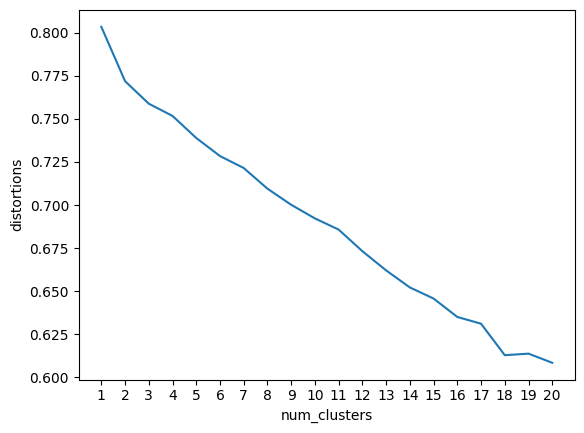

1

In [30]:
elbow_plot(tfidf_matrix_fixed)

In [36]:
num_clusters_fixed = 4

km_fixed, frame_fixed = create_clusters(tfidf_matrix_fixed, num_clusters_fixed, key_list, lyrics_list)
lyrics_cluster_df = print_clusters(km_fixed, frame_fixed, terms_fixed, num_clusters_fixed)
lyrics_cluster_df

CPU times: user 44.8 ms, sys: 36 ms, total: 80.8 ms
Wall time: 30.8 ms
1    55
0    35
2     8
3     3
Name: cluster, dtype: int64
Top terms per cluster:

Cluster 0 words:
night - 0.155
like - 0.098
one - 0.097
walk - 0.089
run - 0.082
feel - 0.075
need - 0.065
never - 0.063
rainbow - 0.060
know - 0.059

Cluster 0 keys:
Carolina County Ball	- elf
Dixie Lee Junction	- elf
Love Me Like A Woman	- elf
Never More	- elf
Rainbow	- elf
Streetwalker	- elf
Wonderworld	- elf
Kill The King	- rainbow
Lady Of The Lake	- rainbow
Rainbow Eyes	- rainbow
Run With The Wolf	- rainbow
Shed (Subtle)	- rainbow
Sixteenth Greenthleves	- rainbow
The Shed	- rainbow
I	- black_sabbath
Over And Over	- black_sabbath
Sins Of The Father	- black_sabbath
Time Machine	- black_sabbath
Too Late	- black_sabbath
Turn Up The Night	- black_sabbath
Tv Crimes	- black_sabbath
Walk Away	- black_sabbath
Breathless	- dio
Don't Talk To Strangers	- dio
Dream Evil	- dio
Egypt (The Chains Are On)	- dio
Evil Eyes	- dio
Invisible	- dio
Ni

/var/folders/zh/mnvg84rj3_7413ycjzpn5y8r0000gp/T/ipykernel_59230/3823591567.py:21: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  cluster_dict[key] = [i, [ terms[order_centroids[i, 0]], 'fuzzy'][km.cluster_centers_[i][order_centroids[i, 0]] < 0.1 ] ]


,cluster,1
Carolina County Ball,0,night
Dixie Lee Junction,0,night
Love Me Like A Woman,0,night
Never More,0,night
Rainbow,0,night
...,...,...
The King Of Rock And Roll,2,rock
When A Woman Cries,2,rock
Heaven And Hell,3,fool
Mob Rules,3,fool


In [32]:
dio_clusters_df = lyrics_cluster_df.reset_index()\
                .rename(columns={'index':'song', 1:'lyrics_cluster'})[['song','lyrics_cluster']]
dio_clusters_df = dio_clusters_df.merge(ronnie_discography[['song','band']], on='song')[['song','band','lyrics_cluster']]
dio_clusters_df

,song,band,lyrics_cluster
0,Ain't It All Amusing,elf,well
1,Annie New Orleans,elf,well
2,Black Swampy Water,elf,well
3,Dixie Lee Junction,elf,well
4,Do The Same Thing,elf,well
...,...,...,...
96,Overlove,dio,night
97,Rock 'n' Roll Children,dio,night
98,Shame On The Night,dio,night
99,Shoot Shoot,dio,night


In [33]:
dio_clusters_df.groupby(['lyrics_cluster']).size()

lyrics_cluster
away     44
night    12
rock      9
well     36
dtype: int64

In [34]:
# saving the result
dio_clusters_df.to_csv('dio_clusters.csv', sep='\t', encoding='utf-8', index=False)

# [IN PROGRESS] 6. Plotting

In [53]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt


In [57]:
print(tfidf_matrix_fixed.shape)

(101, 103)


In [72]:
pca = PCA(2) # for 2D plot
 
df = pca.fit_transform(tfidf_matrix_fixed.toarray()) # .toarray() == transform sparse matrix to numpy array
print(df.shape)

(101, 2)


In [84]:
ronnie_titles = list(ronnie_discography['song'] + ' (' + ronnie_discography['band'] + ')')
print(ronnie_titles[:5])
len(ronnie_titles)

["Ain't It All Amusing (elf)", 'Annie New Orleans (elf)', 'Black Swampy Water (elf)', 'Blanche (elf)', 'Carolina County Ball (elf)']


101

In [73]:
kmeans = KMeans(n_clusters=4, n_init=10)
label = kmeans.fit_predict(df)
centroids = kmeans.cluster_centers_

print(label)

[2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 3 2 0 1 2 2 2 2 3 2 2 0 0 0 3 1 0 0 0 0 3 2
 2 2 0 2 0 0 0 0 2 2 0 0 2 2 0 0 2 0 3 0 3 0 0 0 0 2 0 2 2 3 0 0 0 0 0 3 3
 2 0 0 3 0 0 0 0 0 1 1 0 3 0 3 1 3 1 3 3 2 2 2 1 3 0 1]


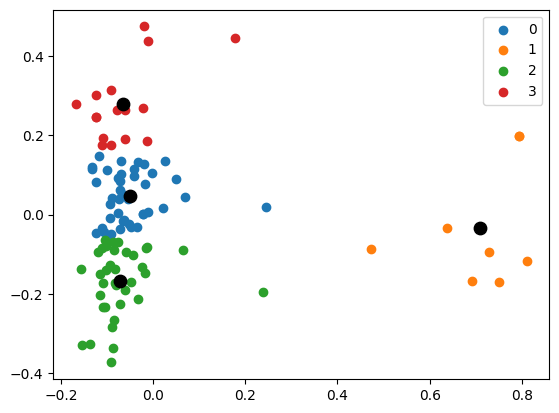

In [74]:
for i in np.unique(label):
    plt.scatter(df[label == i, 0], df[label == i, 1], label=i)
plt.scatter(centroids[:,0], centroids[:,1], s=80, color='black')
plt.legend()
plt.show()